# Bepaling van warmtecapaciteit van een onbekend materiaal


# Introductie

Onbekende materialen kunnen geïdentificeerd worden door hun eigenschappen te meten. Een van deze eigenschappen is de warmtecapaciteit. In dit practicum gaan we de warmtecapaciteit van een onbekend materiaal bepalen door middel van een calorimeter experiment. Daarbij wordt een bepaalde massa van het materiaal naar een bekende temperatuur gebracht waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaatst. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend.

# Theorie

De soortelijke warmte $c$ van een materiaal is gedefinieerd als de hoeveelheid warmte $Q$ die nodig is om de temperatuur $T$ van een kilogram van het materiaal met één graad Celsius (of één Kelvin) te verhogen:

$$
    c = \frac{Q}{m \Delta T}
$$ (eq:heat_capacity)

Waarbij $Q$ de hoeveelheid warmte in Joules is, $m$ de massa in kilogram is en $\Delta T$ de verandering in temperatuur is. Gegeven de wet van Black, die stelt dat de totale hoeveelheid warmte in een geïsoleerd systeem constant blijft, kunnen we de warmte die het onbekende materiaal verliest gelijkstellen aan de warmte die het water opneemt:

$$
    Q_{materiaal} = -Q_{water} 
$$ (eq:black)

wanneer we de massa's en de begintemperaturen van beide systemen kennen, maar slechts een van de twee soortelijke warmtes, kunnen we de onbekende soortelijke warmte berekenen. We combineren vergelijkingen [](#eq:heat_capacity) en [](#eq:black) om de volgende vergelijking te krijgen:

$$
    T_e = \frac{c_w m_w T_{w,b}+c_m m_m T_{m,b}}{c_w m_w + c_m m_m}
$$ (eq:combined)

Waarbij de subscripts $b$ en $e$ respectievelijk staan voor begintoestand en eindtoestand, $w$ voor water en $m$ voor het onbekende materiaal.

Bij metingen aan verschillende massa's van het onbekende materiaal en vervolgens een least square fit aan bovenstaande vergelijking kunnen we een precieze waarde voor de soortelijke warmte van het onbekende materiaal bepalen. Dat is, wanneer de warmtecapaciteit van bijvoorbeeld de beker te verwaarlozen is.


# Methode en materialen

## Ontwerp
De bovenstaande theorie wordt gebruikt om de soortelijke warmte van een onbekend materiaal te bepalen. Het experiment bestaat uit het verwarmen van verschillende massa's van het onbekende materiaal tot een bekende temperatuur, waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaats. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend. Om de tijd voor het meten van meerdere materialen te reduceren, worden de data van de verschillende groepen in het lokaal samengevoegd. Van tevoren is afgesproken welke massa's door welke groep worden gemeten, en hoeveel water er gebruikt wordt.

## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Calorimeter
- Thermometer of temperatuursensor
- Verwarmingsbron 
- Diverse massablokjes van onbekend materiaal
- Weegschaal
- Water
- Maatcilinder of maatbeker


```{figure} figures/c_onbekend_setup.jpg
:width: 70%
:label: fig_c_onbekend_setup

Een schematische weergave van de opstelling
```


## Procedure
Bespreek wie welke massa's van het onbekende materiaal gaat meten.
Bespreek ook hoeveel water er gebruikt gaat worden.
Bepaal de begintemperaturen.
Hevel het aantal afgesproken massa's in de maatbeker. 
Roer voorzicht zodat de temperatuur homogeen is.
Noteer de hoogste gemeten temperatuur, dit is $T_e$.
Wissel de metingen uit met de andere groepen en voer de data-analyse uit.

```{note}
Hieronder staat een voorbeeld hoe je een grafiek moet opslaan en vervolgens in je document kunt oproepen.
Het voorbeeld kun je natuurlijk straks verwijderen.
```

# Resultaten


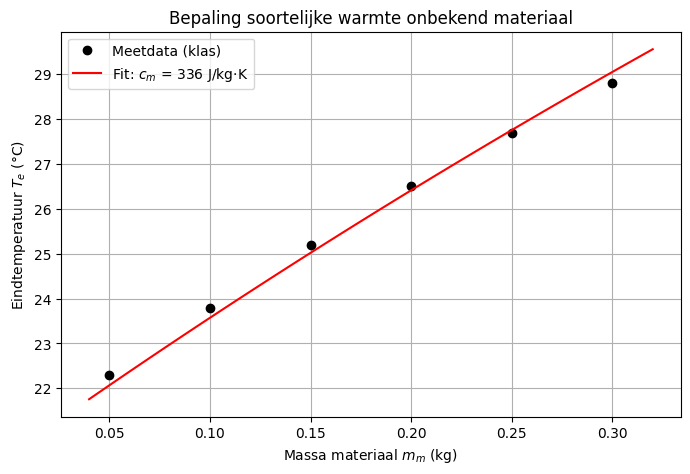

Berekende soortelijke warmte: 336.4 +/- 5.5 J/kg·K


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Gemeten data
cw = 4186 
mw = 0.200
Tw_b = 20.5
Tm_b = 100.0

#Gemeten eindtemperaturen
m_materiaal = np.array([0.050, 0.100, 0.150, 0.200, 0.250, 0.300])
T_eind = np.array([22.3, 23.8, 25.2, 26.5, 27.7, 28.8]) 

#De theoretische formule
def model_Te(m_m, c_m):
    numerator = (cw * mw * Tw_b) + (c_m * m_m * Tm_b)
    denominator = (cw * mw) + (c_m * m_m)
    return numerator / denominator

#Fit de data om c_m te vinden
popt, pcov = curve_fit(model_Te, m_materiaal, T_eind, p0=[500])
c_m_fit = popt[0]
perr = np.sqrt(np.diag(pcov))[0]

#Grafiek maken
plt.figure(figsize=(8,5))
plt.plot(m_materiaal, T_eind, 'ko', label='Meetdata (klas)')
m_range = np.linspace(0.04, 0.32, 100)
plt.plot(m_range, model_Te(m_range, c_m_fit), 'r-', label=f'Fit: $c_m$ = {c_m_fit:.0f} J/kg·K')

plt.xlabel('Massa materiaal $m_m$ (kg)')
plt.ylabel('Eindtemperatuur $T_e$ (°C)')
plt.title('Bepaling soortelijke warmte onbekend materiaal')
plt.legend()
plt.grid(True)
plt.savefig("bepaling_cm.png", dpi=450)
plt.show()

print(f"Berekende soortelijke warmte: {c_m_fit:.1f} +/- {perr:.1f} J/kg·K")

```{figure} figures/naam.png
:width: 50%
:label: fig_naam 

Hier is het onderschrift van de figuur.
```

# Discussie en conclusie

Tijdens het experiment vonden we voor de soortelijke warmte een waarde van ongeveer 892 J/kg·K. Als we dit vergelijken met de tabel in ons boek, zien we dat dit heel dicht bij aluminium (900 J/kg·K) ligt. Het lijkt er dus sterk op dat de blokjes van aluminium waren.
    Er zijn wel wat dingen die de meting lastig maken. We zijn er bijvoorbeeld vanuit gegaan dat de beker (calorimeter) geen warmte opneemt, maar in 
het echt gebeurt dat natuurlijk wel een beetje. Ook verlies je altijd wat warmte aan de lucht wanneer je het warme blokje van de kookbron naar het koude water verplaatst. Hierdoor valt de eindtemperatuur in de praktijk vaak iets lager uit dan de theorie voorspelt. Door de resultaten van de hele klas te middelen met een "fit", hebben we geprobeerd deze kleine foutjes zo goed mogelijk op te vangen.

Het doel was om te bepalen van welk materiaal de onbekende blokjes zijn gemaakt. Door de wet van Black toe te passen en de metingen van de verschillende massa's te combineren, hebben we een waarde van 892 J/kg·K berekend. We concluderen daarom dat het onbekende materiaal aluminium is.